# Replication of the two-asset model in Auclert, Rognile and Straub  (2020)* without sticky information and non-essential graphs.

*Auclert, Adrien, Matthew Rognlie, and Ludwig Straub. Micro jumps, macro humps: Monetary policy and business cycles in an estimated HANK model. No. w26647. National Bureau of Economic Research, 2020.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from pathlib import Path
# Does this help with the import from a parent directory also in VSCode?
sys.path.append(str(Path.cwd().parent))

from HANKnoStickyModel import HANKnoStickyModelClass

# Solve the model

In [2]:
updated_par = {'T': 200}
savefolder = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + 'saved_models')
model = HANKnoStickyModelClass(name='baseline', par=updated_par, savefolder=savefolder)
model.find_ss(do_print=True)

Find optimal beta for market clearing
final evaluation
household problem in ss solved in 1.0 secs [283 iterations]
household problem in ss simulated in 0.2 secs [251 iterations]
steady state found in 28.1 secs
 beta   = 0.95991659
Implied nu =  1.296
Discrepancy in C =  -0.00000000 ->    -0.000000%
Discrepancy in L =   0.00000000 ->     0.000000%
Discrepancy in A =  -0.00000000 ->    -0.000000%
Market clearing residual =  -0.00000000


In [3]:
par = model.par
ss = model.ss
path = model.path
sim = model.sim

# Testing

note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 2.1 secs
household problem simulated along transition in 2.4 secs



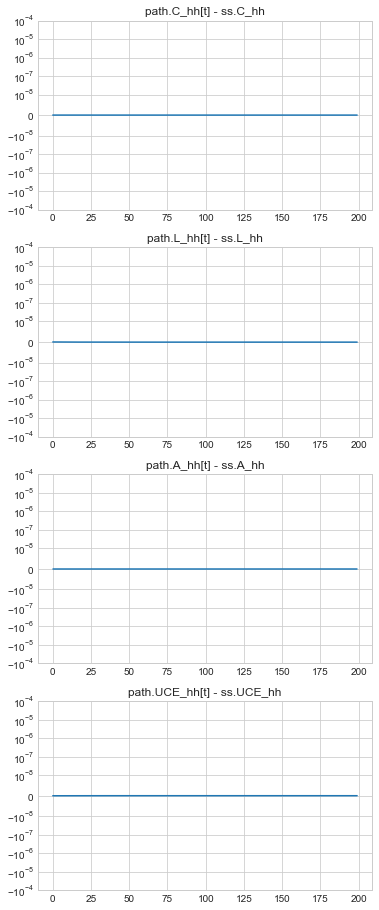

In [4]:
model.test_hh_path()

In [5]:
model.test_path()

note: inputs = steady state value -> expected: no difference to steady state and zero errors

difference to value at steady state:
r              : t0 =  0.0e+00, max abs.  0.0e+00
ra             : t0 = -2.2e-16, max abs.  2.2e-16
rl             : t0 =  0.0e+00, max abs.  0.0e+00
i              : t0 =  0.0e+00, max abs.  0.0e+00
Pi             : t0 =  0.0e+00, max abs.  0.0e+00
Pi_w           : t0 =  0.0e+00, max abs.  0.0e+00
G              : t0 =  0.0e+00, max abs.  0.0e+00
tau            : t0 =  0.0e+00, max abs.  0.0e+00
B              : t0 =  0.0e+00, max abs.  0.0e+00
Y              : t0 =  0.0e+00, max abs.  0.0e+00
N              : t0 =  0.0e+00, max abs.  2.2e-16
I              : t0 =  0.0e+00, max abs.  0.0e+00
K              : t0 = -4.4e-16, max abs.  1.8e-15
Div            : t0 =  0.0e+00, max abs.  2.2e-16
Q              : t0 =  0.0e+00, max abs.  0.0e+00
C              : t0 =  0.0e+00, max abs.  9.3e-15
A              : t0 = -1.8e-15, max abs.  5.9e-13
L              : t0

In [6]:
%matplotlib agg
# turn on graph again with %matplotlib inline
model.test_jacs(s_list=[0,20,50])

note: differences should only be due to numerical errors

direct method:
finding Jacobian wrt. ghost          : 0 20 50 [computed in 1.9 secs]
finding Jacobian wrt. Z              : 0 20 50 [computed in 1.9 secs]
finding Jacobian wrt. ra             : 0 20 50 [computed in 1.8 secs]
finding Jacobian wrt. rl             : 0 20 50 [computed in 2.2 secs]
household Jacobian computed in 8.2 secs
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for Z               in 1.0 secs
curly_Y and curly_D calculated for ra              in 1.0 secs
curly_Y and curly_D calculated for rl              in 1.0 secs
curly_E calculated in 2.6 secs
builiding blocks combined in 0.3 secs
household Jacobian computed in 6.2 secs

C_hh:
 Z              : cond = 2.5e+00 [mean =  4.9e-03]
 ra             : cond = 1.8e+03 [mean =  4.3e-02]
 rl             : cond = 3.2e+01 [mean =  5.7e-04]

L_hh:
 Z              : cond = 8.6e+00 [mean =  3.1e-03]
 ra             : cond = 8.8e+1

In [7]:
# to test convergence
par.tol_broyden = 1e-10
model.find_transition_path(do_print=True, do_print_unknowns=True)

finding the transition path:
 it =   0 -> max. abs. error = 7.20e-04
   r              : minval =   0.012 meanval =   0.012 maxval =   0.012
   w              : minval =   0.798 meanval =   0.798 maxval =   0.798
   Y              : minval =   1.000 meanval =   1.000 maxval =   1.000
   Ip             : minval =   0.118 meanval =   0.118 maxval =   0.118
   Q              : minval =   1.000 meanval =   1.000 maxval =   1.000
   Pi             : minval =   0.000 meanval =   0.000 maxval =   0.000
   Pi_w           : minval =   0.000 meanval =   0.000 maxval =   0.000
   0.00e+00 in fisher_res
   0.00e+00 in w_res
   7.20e-04 in clearing_Y
   0.00e+00 in invest_res
   0.00e+00 in valuation_res
   1.20e-16 in NKPC_res
   5.93e-05 in NKPC_w_res
 it =   1 -> max. abs. error = 4.24e-06
   r              : minval =   0.012 meanval =   0.012 maxval =   0.012
   w              : minval =   0.798 meanval =   0.798 maxval =   0.798
   Y              : minval =   1.000 meanval =   1.000 maxval =  

## Alternative: compute Jacobians directly

In [8]:
# model.compute_jacs(do_print=True)

# MP shock shock

In [9]:
# replication_settings = {'do_replicate': {}}
# replication_settings['do_replicate']['plot_em'] = True
paths = ['G', 'Y', 'C_hh', 'K', 'I',
         'N', 'w', 'tau', 'Pi', 'Pi_w', 'i', 's', 's_w', 'Z',
         'L_hh', 'A_hh',
         'rk', 'r','ra', 'rl',
         'q', 'B',
         'p_eq', 'Div', 'p_int', 'Div_int', 'p_k', 'Div_k']
paths_short = ['Y', 'C_hh', 'K', 'I', 'N', 'w']
lvl_value = ['eg', 'em', 'i', 'Pi', 'Pi_w']
abs_diff = ['r', 'ra', 'rl', 'i']
facs = {'r':100,'ra':100,'rl':100}

finding the transition path:
 it =   0 -> max. abs. error = 3.00e-04
   3.00e-04 in fisher_res
   0.00e+00 in w_res
   8.08e-12 in clearing_Y
   0.00e+00 in invest_res
   0.00e+00 in valuation_res
   1.20e-16 in NKPC_res
   4.62e-12 in NKPC_w_res
 it =   1 -> max. abs. error = 6.98e-06
   7.03e-08 in fisher_res
   4.38e-08 in w_res
   1.71e-06 in clearing_Y
   6.98e-06 in invest_res
   2.19e-07 in valuation_res
   6.69e-08 in NKPC_res
   6.39e-06 in NKPC_w_res
 it =   2 -> max. abs. error = 2.00e-07
   2.80e-10 in fisher_res
   4.35e-10 in w_res
   2.24e-08 in clearing_Y
   2.00e-07 in invest_res
   2.16e-09 in valuation_res
   5.49e-10 in NKPC_res
   3.89e-08 in NKPC_w_res
 it =   3 -> max. abs. error = 4.00e-09
   7.10e-12 in fisher_res
   1.65e-11 in w_res
   4.96e-10 in clearing_Y
   4.00e-09 in invest_res
   4.51e-11 in valuation_res
   1.84e-11 in NKPC_res
   9.18e-10 in NKPC_w_res
 it =   4 -> max. abs. error = 6.06e-11
   5.88e-14 in fisher_res
   8.36e-14 in w_res
   7.12e-12 

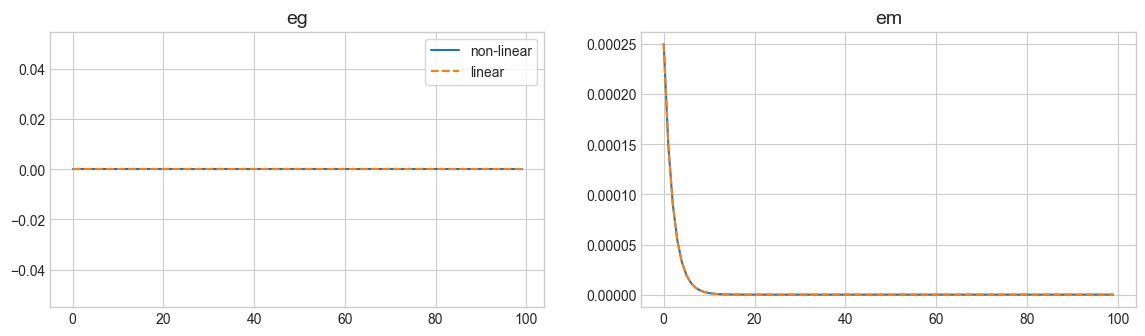


### varnames ###


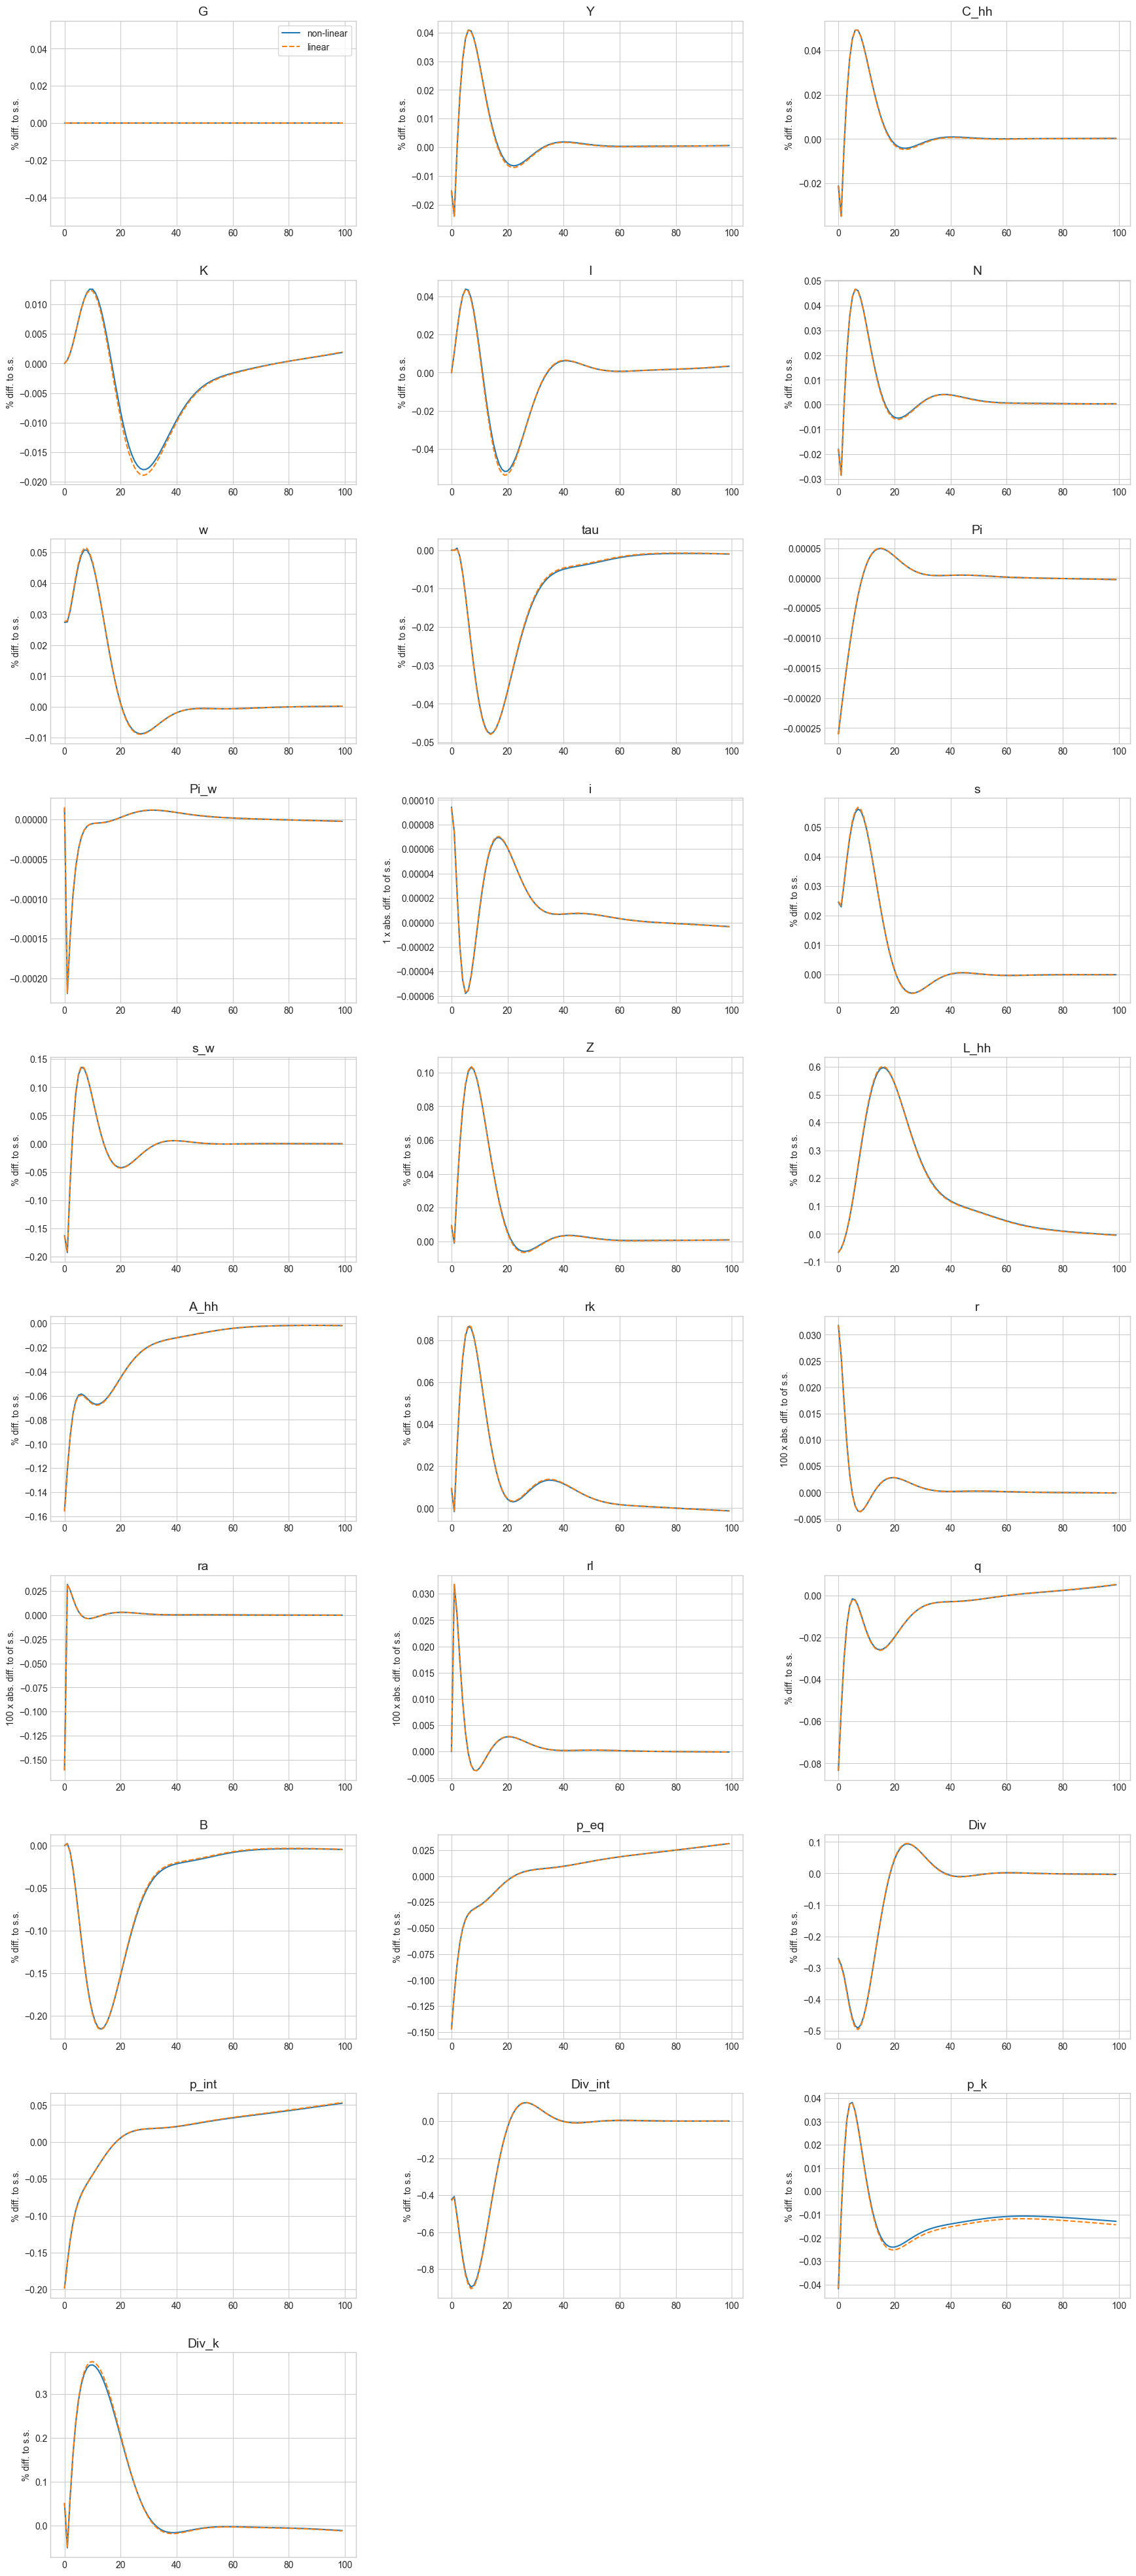


### tagets ###


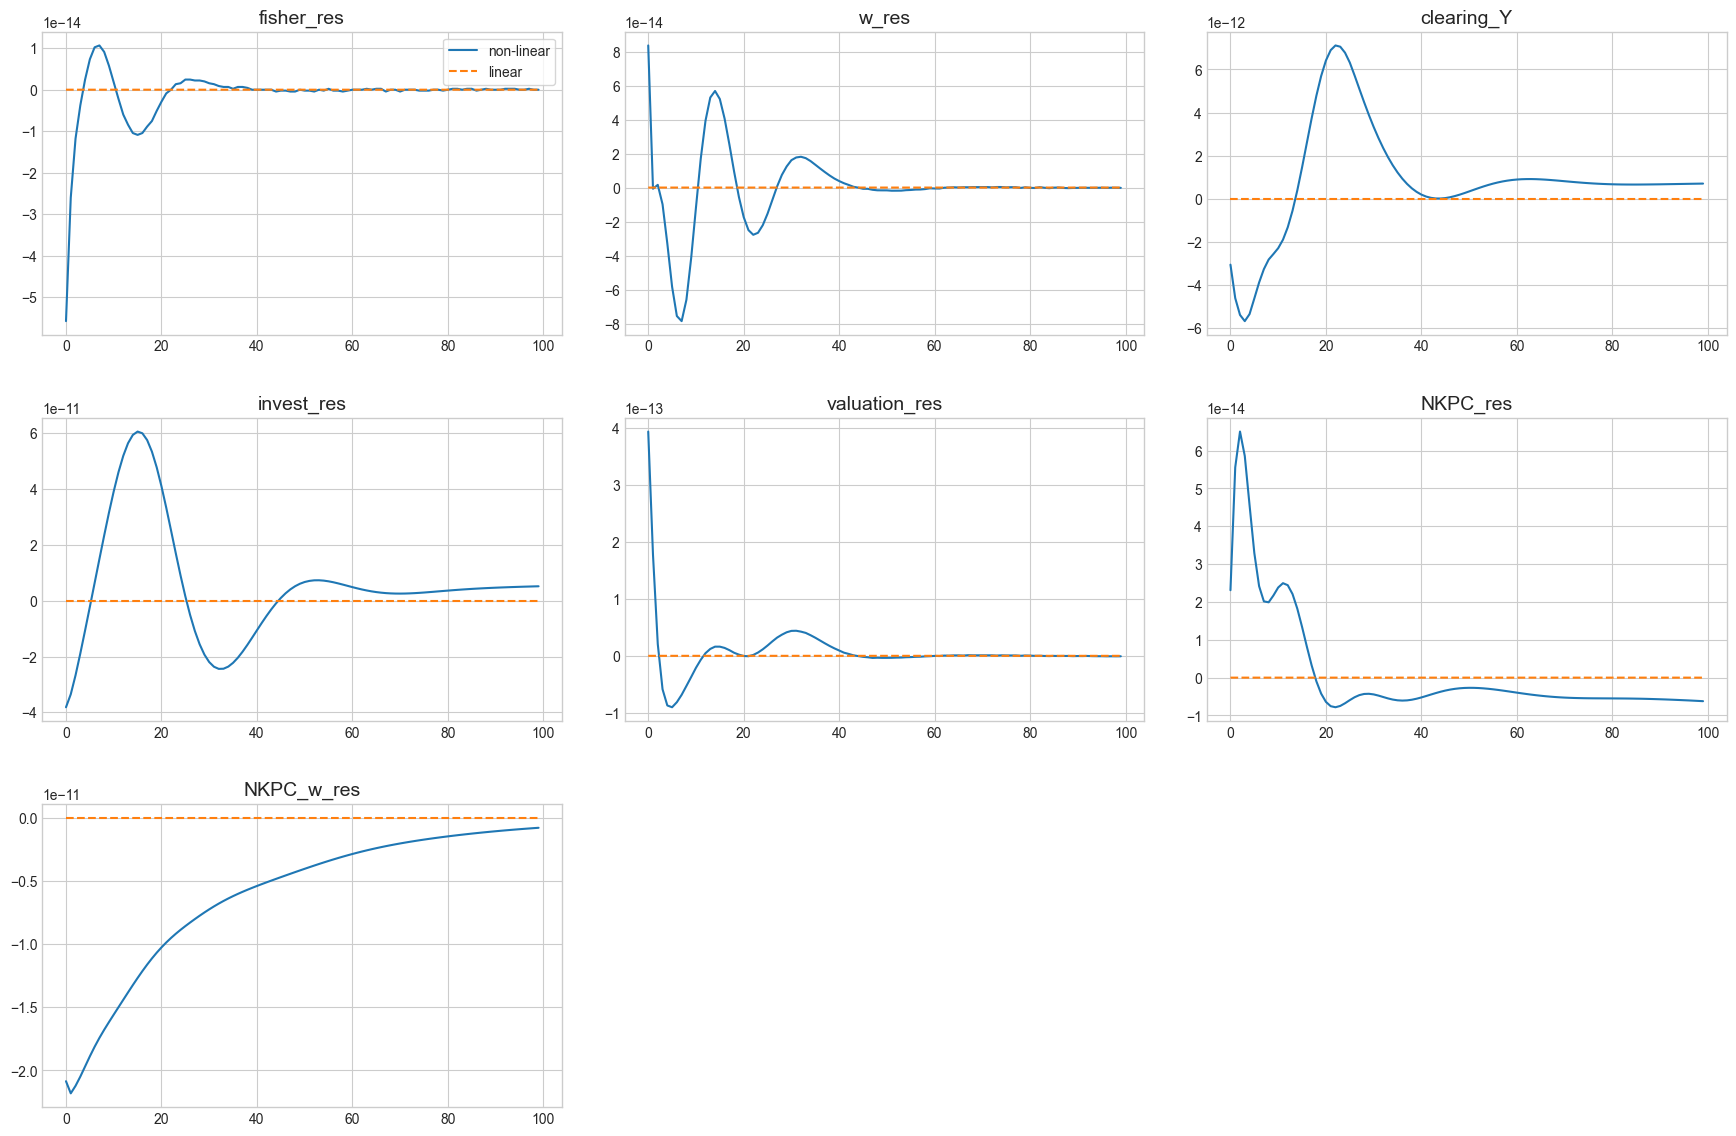

In [10]:
%matplotlib inline
shock_settings = {
            'jump_em': 0.00025,
            'rho_em': 0.6,
            'jump_eg': 0.
        }
model.par.jump_em = shock_settings['jump_em']
model.par.rho_em = shock_settings['rho_em']
model.par.jump_eg = shock_settings['jump_eg']
model.find_transition_path(do_end_check=False, do_print=True)
model.find_IRFs()
model.show_IRFs(paths, lvl_value=lvl_value, abs_diff=abs_diff, facs=facs,ncols=3,T_max=100, do_linear=True, do_shocks=True)

In [11]:
model.path.r[0,par.T-1]

0.011847579988367624